In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '/home/micael/MyWorkspace/ICA/Functions')
import StatisticalAnalysis, amari
import sys
sys.path.insert(0, '/home/micael/MyWorkspace/PtRelAnalysis/functions')
import HistogramFunctions,FigureFunctions,FitFunctions,FunctionsTypes

from scipy import stats
from sklearn.decomposition import PCA, FastICA
from sklearn.metrics import mean_squared_error

import rootnotes
import root_numpy
import ROOT
import StatisticalAnalysis
#from ROOT import TCanvas, TFile, TPaveText
from scipy.stats import chisquare,kurtosistest,normaltest

source_path = '/home/micael/MyWorkspace/ICA/Mixture_keys'
# local to save all results and images 
save_images = '/home/micael/Documents/Mestrado/ICA/trabalho_parte2'
obs_path = '/home/micael/MyWorkspace/ICA/'

# Calibration of Divergences

In [ ]:
# define the pdf for calibration 
from scipy.stats import *
chi2.stats(4)

In [ ]:
# Calibrate the KL and JS divergences
i_stats = 1000
loc, scale = 0.,1.
laplacian = np.reshape(np.random.laplace(loc,scale, i_stats),[1,i_stats])
uniform = np.reshape(np.random.uniform(-2*scale,2*scale,i_stats),[1,i_stats])
gaus = np.reshape(np.random.normal(loc,scale,i_stats),[1,i_stats])
#rayleigh = np.reshape(np.random.rayleigh(scale, i_stats),[1,i_stats])
#chi = np.reshape(np.random.chisquare(4, i_stats),[1,i_stats])

C = np.zeros([4,i_stats])
C[0,:]=uniform
C[1,:]=gaus
C[2,:]=laplacian
C[3,:]=norm_K
#C[4,:]=chi
#StatisticalAnalysis.JSDiv(C,C)
KL_div= StatisticalAnalysis.CreateKLsMatrix(C,C)
SKL_div = StatisticalAnalysis.SKLDiv(KL_div[0],KL_div[1])
JS_div = StatisticalAnalysis.JSDiv(C,C)

In [ ]:
KL_div,SKL_div,JS_div

In [ ]:
SKL_div,JS_div

# Separate the mixtures
 $\to$ Make decision by using the ROOT Fit

# First Mixture 

Fontes:

$s_0$ = Uniforme

$s_1$ = $\chi ^2 $

$s_2$ = Gaussiana

$s_3$ = Laplaciana

In [2]:
sources = np.loadtxt(source_path+'/'+'SixthSource100Stats.txt')
#matrix_A = np.loadtxt(source_path+'/'+'SixthMixMatrix.txt')

x = np.loadtxt(obs_path+'SixthMixture100Stats.txt')
x.shape,sources.shape

information_algorithm_matrix = np.zeros([5,3])
information_algorithm_matrix.shape

(5, 3)

In [5]:
MI_x = StatisticalAnalysis.create_mutual_info_matrix(x,x)
MI_x

array([[ 1.        ,  0.0857295 ,  0.05489171,  0.01847432],
       [ 0.0857295 ,  1.        ,  0.11565322,  0.10274412],
       [ 0.05489171,  0.11565322,  1.        ,  0.04465421],
       [ 0.01847432,  0.10274412,  0.04465421,  1.        ]])

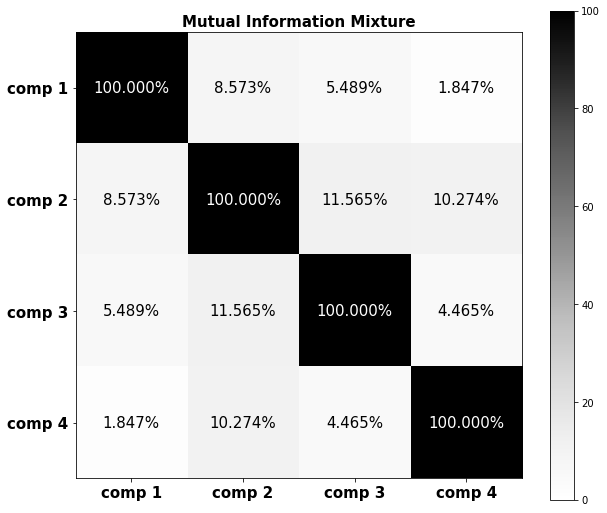

In [6]:
StatisticalAnalysis.plot_mutual_info(MI_x,title='Mixture',output=save_images,name='run6_mix_MI_100',save=True)

In [7]:
MI_s = StatisticalAnalysis.create_mutual_info_matrix(sources,sources)
MI_s

array([[ 1.        ,  0.08779881,  0.04698232,  0.0695622 ],
       [ 0.08779881,  1.        ,  0.18478701,  0.14138755],
       [ 0.04698232,  0.18478701,  1.        ,  0.22336193],
       [ 0.0695622 ,  0.14138755,  0.22336193,  1.        ]])

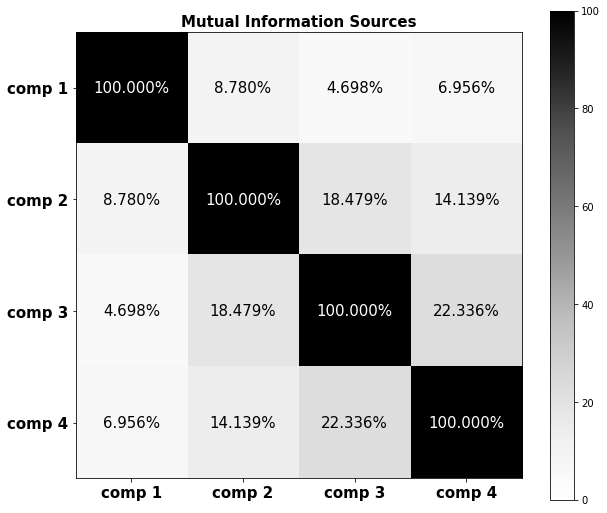

In [8]:
StatisticalAnalysis.plot_mutual_info(MI_s,title='Sources',output=save_images,name='run6_sources_MI_100',save=True)

In [9]:
KL_div= StatisticalAnalysis.CreateKLsMatrix(x,sources)
SKL_div = StatisticalAnalysis.SKLDiv(KL_div[0],KL_div[1])
JS_div = StatisticalAnalysis.JSDiv(x,sources)

KL_div,SKL_div,JS_div

([array([[ 0.27351552,  0.48379058,  0.71262938,  0.57715802],
         [ 0.90826326,  1.41522279,  1.62025859,  1.40630678],
         [ 0.14487326,  0.38179569,  0.5558689 ,  0.48546045],
         [ 0.23680497,  0.42325102,  0.61766015,  0.46518696]]),
  array([[ 0.25981066,  0.57868918,  0.13940863,  0.23861131],
         [ 0.32919424,  0.74857711,  0.28837669,  0.33946916],
         [ 0.50479027,  0.71119165,  0.37293225,  0.32878772],
         [ 0.49405216,  0.67518321,  0.38607349,  0.33700322]])],
 array([[ 0.26666309,  0.53123988,  0.426019  ,  0.40788466],
        [ 0.61872875,  1.08189995,  0.95431764,  0.87288797],
        [ 0.32483176,  0.54649367,  0.46440057,  0.40712408],
        [ 0.36542857,  0.54921712,  0.50186682,  0.40109509]]),
 array([[ 0.15657277,  0.32525072,  0.413302  ,  0.40727725],
        [ 0.502783  ,  0.76329923,  0.83139314,  0.72048747],
        [ 0.16750808,  0.26128177,  0.32187359,  0.35591514],
        [ 0.29948664,  0.24903967,  0.44740314,  0.2586

In [10]:
# Make FastICA and counting time and interations
init_time = time.time()
ica = FastICA(algorithm='parallel',whiten=True,fun='logcosh',max_iter=10000)
fit = ica.fit(x.T)
print 'number of interations:', fit.n_iter_ 
y = ica.transform(x.T)
recovered_sources = y.T
current_time = time.time()
print 'Time to converges the FastICA: %1.3f seconds'%(current_time-init_time)
convergence_time = round(current_time-init_time,3)
numero_interacao = fit.n_iter_

number of interations: 6
Time to converges the FastICA: 0.004 seconds


In [11]:
print 'E1 = ',amari.amariError(matrix_A,fit.mixing_),'E2 = ',amari.amariError(matrix_A,fit.mixing_,squares=True)

E1 = 

NameError: name 'matrix_A' is not defined

In [12]:
MI_reco = StatisticalAnalysis.create_mutual_info_matrix(recovered_sources,recovered_sources)
MI_reco


array([[ 1.        ,  0.00920504,  0.06415319,  0.1091901 ],
       [ 0.00920504,  1.        ,  0.06086973,  0.04735007],
       [ 0.06415319,  0.06086973,  1.        ,  0.11741718],
       [ 0.1091901 ,  0.04735007,  0.11741718,  1.        ]])

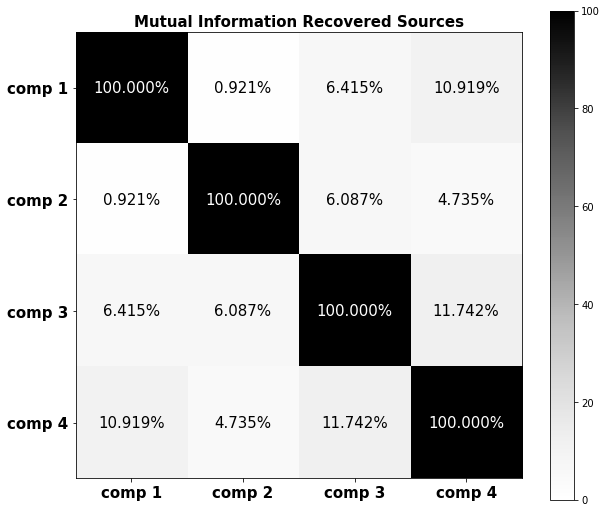

In [13]:
StatisticalAnalysis.plot_mutual_info(MI_reco,title='Recovered Sources',output=save_images,
                                     name='run6_reco_MI_100',save=True)

In [14]:
MI_sreco = StatisticalAnalysis.create_mutual_info_matrix(sources,recovered_sources)
MI_sreco

array([[ 0.05062391,  0.61544381,  0.07551378,  0.10587474],
       [ 0.03644129,  0.03166283,  0.07016615,  0.33654149],
       [ 0.0804907 ,  0.03340933,  0.6295149 ,  0.14115352],
       [ 0.54855511,  0.02809631,  0.07028931,  0.15963202]])

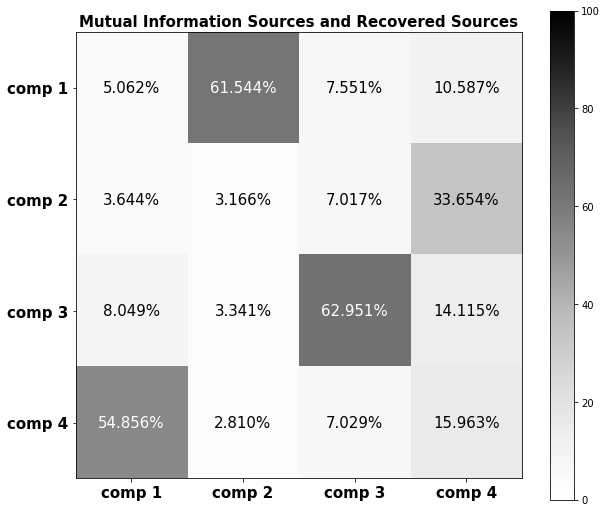

In [15]:
StatisticalAnalysis.plot_mutual_info(MI_sreco,title='Sources and Recovered Sources',output=save_images,
                                     name='run6_sourcesreco_MI_100',save=True)

In [25]:
ordened_recovered_sources = np.zeros_like(recovered_sources)
ordened_recovered_sources[0,:] = recovered_sources[1,:]
ordened_recovered_sources[1,:] = recovered_sources[3,:]
ordened_recovered_sources[2,:] = recovered_sources[2,:]
ordened_recovered_sources[3,:] = recovered_sources[0,:]


Ordened_MI = StatisticalAnalysis.create_mutual_info_matrix(sources,ordened_recovered_sources)
Ordened_MI

array([[ 0.61544381,  0.10587474,  0.07551378,  0.05062391],
       [ 0.03166283,  0.33654149,  0.07016615,  0.03644129],
       [ 0.03340933,  0.14115352,  0.6295149 ,  0.0804907 ],
       [ 0.02809631,  0.15963202,  0.07028931,  0.54855511]])

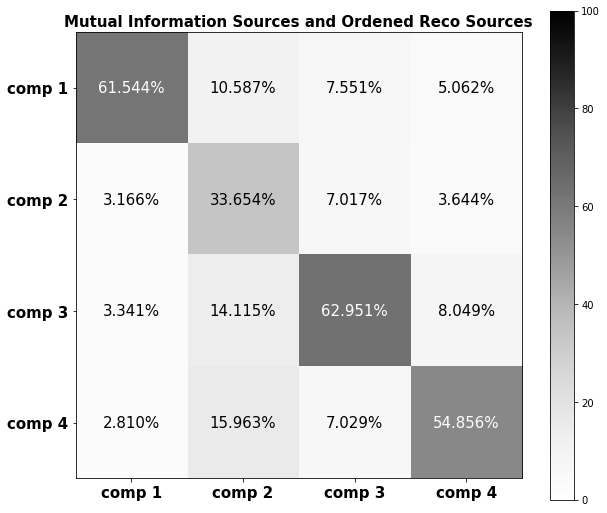

In [26]:
StatisticalAnalysis.plot_mutual_info(Ordened_MI,title='Sources and Ordened Reco Sources',output=save_images,
                                     name='run6_sourcesreco_ordened_MI_100',save=True)

In [27]:
KL_div= StatisticalAnalysis.CreateKLsMatrix(sources,ordened_recovered_sources)
SKL_div = StatisticalAnalysis.SKLDiv(KL_div[0],KL_div[1])
JS_div = StatisticalAnalysis.JSDiv(sources,ordened_recovered_sources)

In [28]:
SKL_div,JS_div

(array([[ 0.26024868,  0.44995051,  0.42779859,  0.35387452],
        [ 0.6967889 ,  0.7133333 ,  0.98387728,  0.72238199],
        [ 0.29928979,  0.63487565,  0.46693893,  0.42374313],
        [ 0.31763525,  0.59137847,  0.49037275,  0.42028294]]),
 array([[ 0.16288443,  0.59840276,  0.13623346,  0.16317344],
        [ 0.19045588,  0.33747938,  0.20633069,  0.17983911],
        [ 0.44599674,  0.8505621 ,  0.30663318,  0.32208925],
        [ 0.32194744,  0.5811085 ,  0.26295097,  0.27013068]]))

In [29]:
import pandas as pd

JS = pd.DataFrame(JS_div)
SKL = pd.DataFrame(SKL_div)
print JS.to_latex(),SKL.to_latex()

\begin{tabular}{lrrrr}
\toprule
{} &         0 &         1 &         2 &         3 \\
\midrule
0 &  0.162884 &  0.598403 &  0.136233 &  0.163173 \\
1 &  0.190456 &  0.337479 &  0.206331 &  0.179839 \\
2 &  0.445997 &  0.850562 &  0.306633 &  0.322089 \\
3 &  0.321947 &  0.581109 &  0.262951 &  0.270131 \\
\bottomrule
\end{tabular}
\begin{tabular}{lrrrr}
\toprule
{} &         0 &         1 &         2 &         3 \\
\midrule
0 &  0.260249 &  0.449951 &  0.427799 &  0.353875 \\
1 &  0.696789 &  0.713333 &  0.983877 &  0.722382 \\
2 &  0.299290 &  0.634876 &  0.466939 &  0.423743 \\
3 &  0.317635 &  0.591378 &  0.490373 &  0.420283 \\
\bottomrule
\end{tabular}



In [30]:
information_algorithm_matrix[0,0] = numero_interacao
information_algorithm_matrix[1,0] = convergence_time
information_algorithm_matrix[2,0] = 0#amari.amariError(matrix_A,fit.mixing_)
information_algorithm_matrix[3,0] = 0#amari.amariError(matrix_A,fit.mixing_,squares=True)
information_algorithm_matrix[4,0] = mean_squared_error(sources,ordened_recovered_sources)
information_algorithm_matrix

array([[  6.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  4.00000000e-03,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  6.42403186e+00,   0.00000000e+00,   0.00000000e+00]])

# Using 1000 stats

In [31]:
sources = np.loadtxt(source_path+'/'+'SixthSource1000Stats.txt')

x = np.loadtxt(obs_path+'SixthMixture1000Stats.txt')


In [32]:
MI_x = StatisticalAnalysis.create_mutual_info_matrix(x,x)
MI_x

array([[ 1.        ,  0.02140334,  0.00819163,  0.01378104],
       [ 0.02140334,  1.        ,  0.02948183,  0.02392454],
       [ 0.00819163,  0.02948183,  1.        ,  0.0136531 ],
       [ 0.01378104,  0.02392454,  0.0136531 ,  1.        ]])

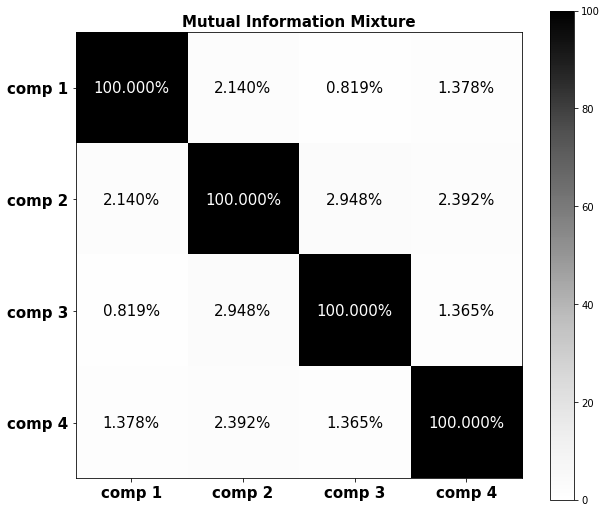

In [33]:
StatisticalAnalysis.plot_mutual_info(MI_x,title='Mixture',output=save_images,name='run6_mix_MI_1k',save=True)

In [34]:
MI_s = StatisticalAnalysis.create_mutual_info_matrix(sources,sources)
MI_s

array([[ 1.        ,  0.01756539,  0.01901056,  0.01843867],
       [ 0.01756539,  1.        ,  0.0644939 ,  0.0838705 ],
       [ 0.01901056,  0.0644939 ,  1.        ,  0.07981505],
       [ 0.01843867,  0.0838705 ,  0.07981505,  1.        ]])

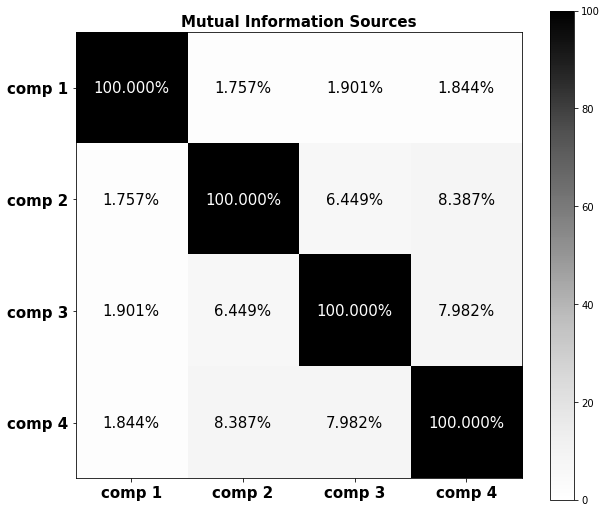

In [35]:
StatisticalAnalysis.plot_mutual_info(MI_s,title='Sources',output=save_images,name='run6_sources_MI_1k',save=True)

In [36]:
# Make FastICA and counting time and interations
init_time = time.time()
ica = FastICA(algorithm='parallel',whiten=True,fun='logcosh',max_iter=10000)
fit = ica.fit(x.T)
print 'number of interations:', fit.n_iter_ 
y = ica.transform(x.T)
recovered_sources = y.T
current_time = time.time()
print 'Time to converges the FastICA: %1.3f seconds'%(current_time-init_time)
numero_interacao = fit.n_iter_
convergence_time = round(current_time-init_time,3)

number of interations: 3
Time to converges the FastICA: 0.015 seconds


In [37]:
MI_reco = StatisticalAnalysis.create_mutual_info_matrix(recovered_sources,recovered_sources)
MI_reco

array([[ 1.        ,  0.00884459,  0.01142348,  0.01918517],
       [ 0.00884459,  1.        ,  0.01801343,  0.02809886],
       [ 0.01142348,  0.01801343,  1.        ,  0.04256931],
       [ 0.01918517,  0.02809886,  0.04256931,  1.        ]])

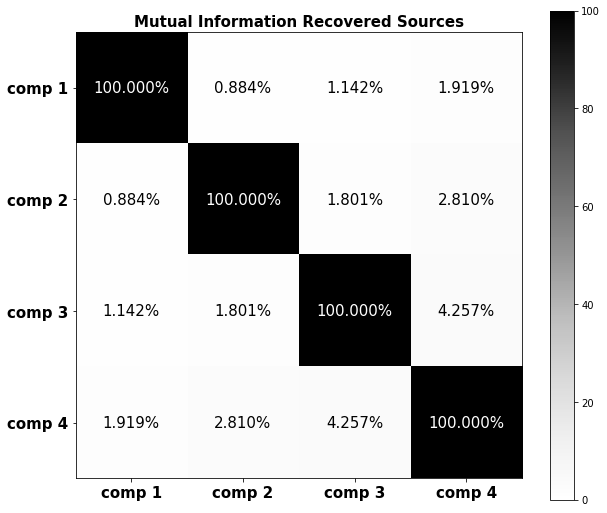

In [38]:
StatisticalAnalysis.plot_mutual_info(MI_reco,title='Recovered Sources',output=save_images,
                                     name='run6_reco_MI_1k',save=True)

In [39]:
MI_sreco = StatisticalAnalysis.create_mutual_info_matrix(sources,recovered_sources)
MI_sreco

array([[ 0.77053336,  0.0177083 ,  0.01634591,  0.03624363],
       [ 0.01229993,  0.01725159,  0.02216747,  0.44216786],
       [ 0.01178592,  0.67348666,  0.02142286,  0.09111663],
       [ 0.00972957,  0.02045191,  0.5804438 ,  0.1569102 ]])

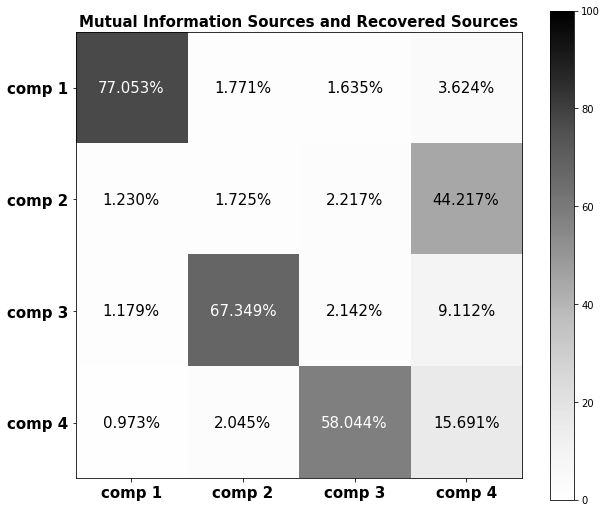

In [40]:
StatisticalAnalysis.plot_mutual_info(MI_sreco,title='Sources and Recovered Sources',output=save_images,
                                     name='run6_sourcesreco_MI_1k',save=True)

In [41]:
ordened_recovered_sources = np.zeros_like(recovered_sources)
ordened_recovered_sources[0,:] = recovered_sources[0,:]
ordened_recovered_sources[1,:] = recovered_sources[3,:]
ordened_recovered_sources[2,:] = recovered_sources[1,:]
ordened_recovered_sources[3,:] = recovered_sources[2,:]

Ordened_MI = StatisticalAnalysis.create_mutual_info_matrix(sources,ordened_recovered_sources)
Ordened_MI

array([[ 0.77053336,  0.03624363,  0.0177083 ,  0.01634591],
       [ 0.01229993,  0.44216786,  0.01725159,  0.02216747],
       [ 0.01178592,  0.09111663,  0.67348666,  0.02142286],
       [ 0.00972957,  0.1569102 ,  0.02045191,  0.5804438 ]])

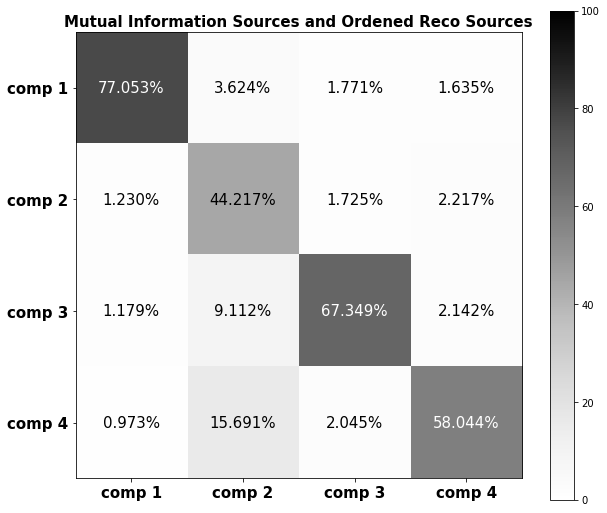

In [42]:
StatisticalAnalysis.plot_mutual_info(Ordened_MI,title='Sources and Ordened Reco Sources',output=save_images,
                                     name='run6_sourcesreco_ordened_MI_1k',save=True)

In [43]:
KL_div= StatisticalAnalysis.CreateKLsMatrix(sources,ordened_recovered_sources)
SKL_div = StatisticalAnalysis.SKLDiv(KL_div[0],KL_div[1])
JS_div = StatisticalAnalysis.JSDiv(sources,ordened_recovered_sources)

In [44]:
SKL_div,JS_div

(array([[ 0.27548236,  0.61867407,  0.55163414,  0.54163831],
        [ 0.70563689,  0.77375487,  1.32290072,  1.11809164],
        [ 0.35007155,  0.72677441,  0.53119873,  0.53305689],
        [ 0.45747902,  0.86526731,  0.58521799,  0.59901123]]),
 array([[ 0.14990261,  0.54324614,  0.07712794,  0.09598549],
        [ 0.24158162,  0.42729938,  0.20906921,  0.23402727],
        [ 0.59496818,  1.15829348,  0.33241841,  0.31760195],
        [ 0.48525959,  1.15724119,  0.37504831,  0.3616582 ]]))

In [45]:
import pandas as pd

JS = pd.DataFrame(JS_div)
SKL = pd.DataFrame(SKL_div)
print JS.to_latex(),SKL.to_latex()

\begin{tabular}{lrrrr}
\toprule
{} &         0 &         1 &         2 &         3 \\
\midrule
0 &  0.149903 &  0.543246 &  0.077128 &  0.095985 \\
1 &  0.241582 &  0.427299 &  0.209069 &  0.234027 \\
2 &  0.594968 &  1.158293 &  0.332418 &  0.317602 \\
3 &  0.485260 &  1.157241 &  0.375048 &  0.361658 \\
\bottomrule
\end{tabular}
\begin{tabular}{lrrrr}
\toprule
{} &         0 &         1 &         2 &         3 \\
\midrule
0 &  0.275482 &  0.618674 &  0.551634 &  0.541638 \\
1 &  0.705637 &  0.773755 &  1.322901 &  1.118092 \\
2 &  0.350072 &  0.726774 &  0.531199 &  0.533057 \\
3 &  0.457479 &  0.865267 &  0.585218 &  0.599011 \\
\bottomrule
\end{tabular}



In [46]:
information_algorithm_matrix[0,1] = numero_interacao
information_algorithm_matrix[1,1] = convergence_time
information_algorithm_matrix[2,1] = 0#amari.amariError(matrix_A,fit.mixing_)
information_algorithm_matrix[3,1] = 0#amari.amariError(matrix_A,fit.mixing_,squares=True)
information_algorithm_matrix[4,1] = mean_squared_error(sources,recovered_sources)
information_algorithm_matrix

array([[  6.00000000e+00,   3.00000000e+00,   0.00000000e+00],
       [  4.00000000e-03,   1.50000000e-02,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  6.42403186e+00,   7.26214821e+00,   0.00000000e+00]])

# Using 100K stats

In [47]:
sources = np.loadtxt(source_path+'/'+'SixthSource100000Stats.txt')

x = np.loadtxt(obs_path+'SixthMixture100000Stats.txt')


In [48]:
MI_x = StatisticalAnalysis.create_mutual_info_matrix(x,x)
MI_x

array([[ 1.        ,  0.00203207,  0.00131582,  0.00133255],
       [ 0.00203207,  1.        ,  0.00357653,  0.00334815],
       [ 0.00131582,  0.00357653,  1.        ,  0.00200578],
       [ 0.00133255,  0.00334815,  0.00200578,  1.        ]])

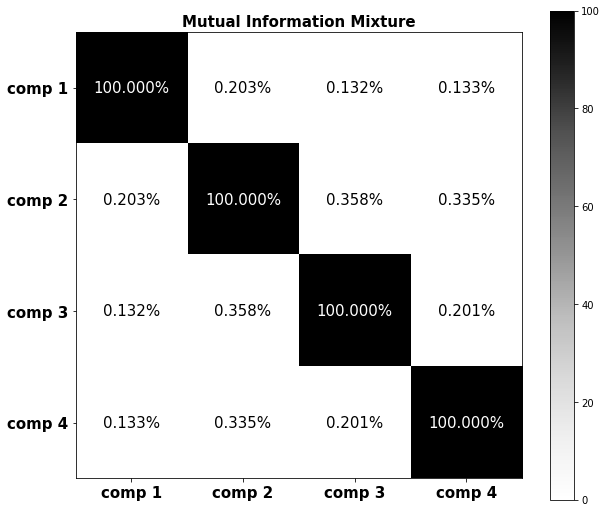

In [49]:
StatisticalAnalysis.plot_mutual_info(MI_x,title='Mixture',output=save_images,name='run6_mix_MI_100k',save=True)

In [50]:
MI_s = StatisticalAnalysis.create_mutual_info_matrix(sources,sources)
MI_s

array([[ 1.        ,  0.0025655 ,  0.0027471 ,  0.00268419],
       [ 0.0025655 ,  1.        ,  0.01261232,  0.01475425],
       [ 0.0027471 ,  0.01261232,  1.        ,  0.01169168],
       [ 0.00268419,  0.01475425,  0.01169168,  1.        ]])

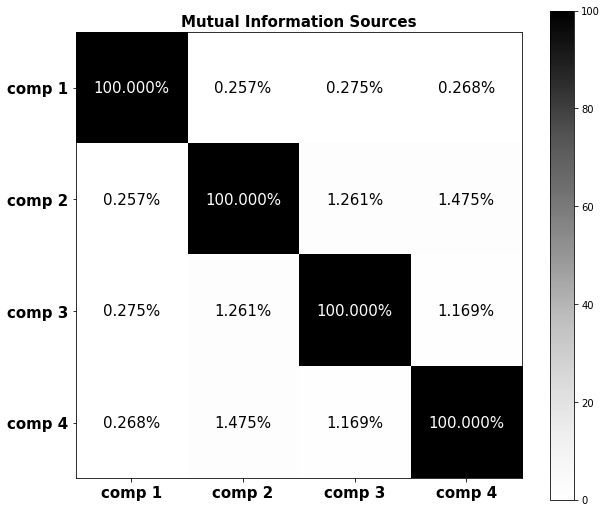

In [51]:
StatisticalAnalysis.plot_mutual_info(MI_s,title='Sources',output=save_images,name='run6_sources_MI_100k',save=True)

In [52]:
# Make FastICA and counting time and interations
init_time = time.time()
ica = FastICA(algorithm='parallel',whiten=True,fun='logcosh',max_iter=10000)
fit = ica.fit(x.T)
print 'number of interations:', fit.n_iter_ 
y = ica.transform(x.T)
recovered_sources = y.T
current_time = time.time()
print 'Time to converges the FastICA: %1.3f seconds'%(current_time-init_time)
numero_interacao = fit.n_iter_
convergence_time = round(current_time-init_time,3)

number of interations: 3
Time to converges the FastICA: 0.175 seconds


In [53]:
MI_reco = StatisticalAnalysis.create_mutual_info_matrix(recovered_sources,recovered_sources)
MI_reco

array([[ 1.        ,  0.00132152,  0.00126319,  0.00221299],
       [ 0.00132152,  1.        ,  0.00211589,  0.00327847],
       [ 0.00126319,  0.00211589,  1.        ,  0.00360613],
       [ 0.00221299,  0.00327847,  0.00360613,  1.        ]])

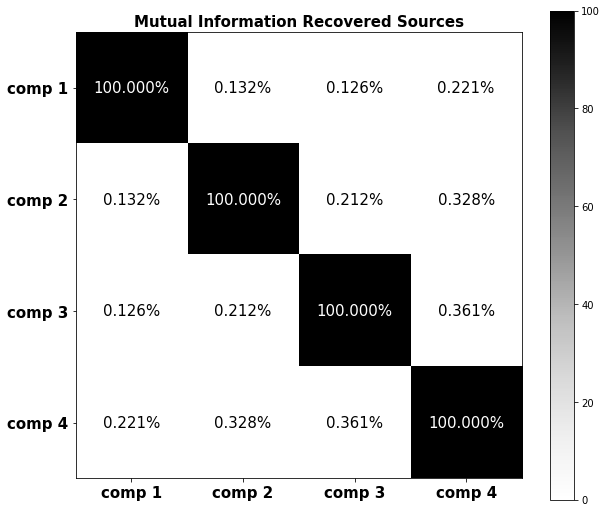

In [54]:
StatisticalAnalysis.plot_mutual_info(MI_reco,title='Recovered Sources',output=save_images,
                                     name='run6_reco_MI_100k',save=True)

In [55]:
MI_sreco = StatisticalAnalysis.create_mutual_info_matrix(sources,recovered_sources)
MI_sreco

array([[ 0.83050696,  0.00201936,  0.00208299,  0.00456229],
       [ 0.0015221 ,  0.00195809,  0.00198389,  0.57008521],
       [ 0.00149203,  0.0022132 ,  0.78791253,  0.02106958],
       [ 0.00124929,  0.66186858,  0.00219178,  0.0493367 ]])

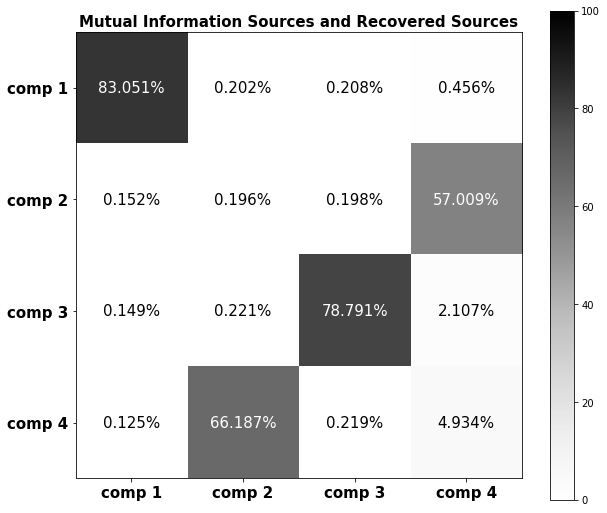

In [56]:
StatisticalAnalysis.plot_mutual_info(MI_sreco,title='Sources and Recovered Sources',output=save_images,
                                     name='run6_sourcesreco_MI_100k',save=True)

In [57]:
ordened_recovered_sources = np.zeros_like(recovered_sources)
ordened_recovered_sources[0,:] = recovered_sources[0,:]
ordened_recovered_sources[1,:] = recovered_sources[3,:]
ordened_recovered_sources[2,:] = recovered_sources[2,:]
ordened_recovered_sources[3,:] = recovered_sources[1,:]

Ordened_MI = StatisticalAnalysis.create_mutual_info_matrix(sources,ordened_recovered_sources)
Ordened_MI

array([[ 0.83050696,  0.00456229,  0.00208299,  0.00201936],
       [ 0.0015221 ,  0.57008521,  0.00198389,  0.00195809],
       [ 0.00149203,  0.02106958,  0.78791253,  0.0022132 ],
       [ 0.00124929,  0.0493367 ,  0.00219178,  0.66186858]])

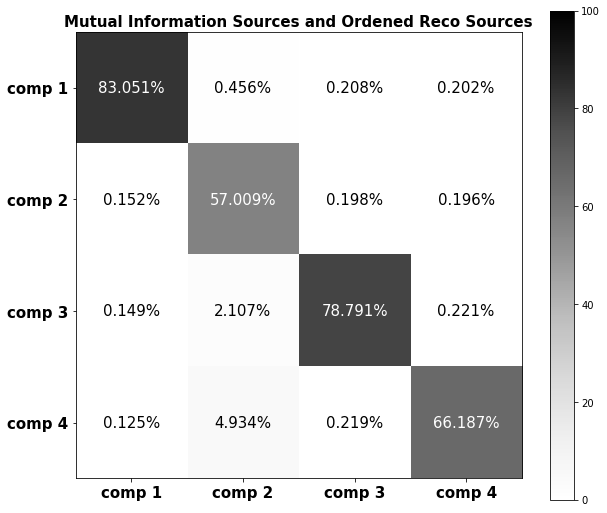

In [58]:
StatisticalAnalysis.plot_mutual_info(Ordened_MI,title='Sources and Ordened Reco Sources',output=save_images,
                                     name='run6_sourcesreco_ordened_MI_100k',save=True)

In [59]:
KL_div= StatisticalAnalysis.CreateKLsMatrix(sources,ordened_recovered_sources)
SKL_div = StatisticalAnalysis.SKLDiv(KL_div[0],KL_div[1])
JS_div = StatisticalAnalysis.JSDiv(sources,ordened_recovered_sources)

In [60]:
SKL_div,JS_div

(array([[ 0.27482481,  0.73124152,  0.51705997,  0.45331729],
        [ 0.92502566,  2.27351106,  1.46365638,  1.51284145],
        [ 0.37646271,  0.98576104,  0.68270841,  0.65499537],
        [ 0.56831525,  1.1821899 ,  0.82349445,  0.77495952]]),
 array([[ 0.15647656,  0.72193989,  0.05078948,  0.08316376],
        [ 0.2688481 ,  1.23955044,  0.35627813,  0.39649368],
        [ 0.48962657,  1.21959418,  0.44518188,  0.43906333],
        [ 0.40556556,  1.23329013,  0.43523358,  0.40574825]]))

In [61]:
import pandas as pd

JS = pd.DataFrame(JS_div)
SKL = pd.DataFrame(SKL_div)
print JS.to_latex(),SKL.to_latex()

\begin{tabular}{lrrrr}
\toprule
{} &         0 &         1 &         2 &         3 \\
\midrule
0 &  0.156477 &  0.721940 &  0.050789 &  0.083164 \\
1 &  0.268848 &  1.239550 &  0.356278 &  0.396494 \\
2 &  0.489627 &  1.219594 &  0.445182 &  0.439063 \\
3 &  0.405566 &  1.233290 &  0.435234 &  0.405748 \\
\bottomrule
\end{tabular}
\begin{tabular}{lrrrr}
\toprule
{} &         0 &         1 &         2 &         3 \\
\midrule
0 &  0.274825 &  0.731242 &  0.517060 &  0.453317 \\
1 &  0.925026 &  2.273511 &  1.463656 &  1.512841 \\
2 &  0.376463 &  0.985761 &  0.682708 &  0.654995 \\
3 &  0.568315 &  1.182190 &  0.823494 &  0.774960 \\
\bottomrule
\end{tabular}



In [62]:
information_algorithm_matrix[0,2] = numero_interacao
information_algorithm_matrix[1,2] = convergence_time
information_algorithm_matrix[2,2] = 0#amari.amariError(matrix_A,fit.mixing_)
information_algorithm_matrix[3,2] = 0#amari.amariError(matrix_A,fit.mixing_,squares=True)
information_algorithm_matrix[4,2] = mean_squared_error(sources,recovered_sources)
information_algorithm_matrix

array([[  6.00000000e+00,   3.00000000e+00,   3.00000000e+00],
       [  4.00000000e-03,   1.50000000e-02,   1.75000000e-01],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  6.42403186e+00,   7.26214821e+00,   7.11133204e+00]])

In [63]:
import pandas as pd

info_run1 = pd.DataFrame(information_algorithm_matrix)
print info_run1.to_latex()

\begin{tabular}{lrrr}
\toprule
{} &         0 &         1 &         2 \\
\midrule
0 &  6.000000 &  3.000000 &  3.000000 \\
1 &  0.004000 &  0.015000 &  0.175000 \\
2 &  0.000000 &  0.000000 &  0.000000 \\
3 &  0.000000 &  0.000000 &  0.000000 \\
4 &  6.424032 &  7.262148 &  7.111332 \\
\bottomrule
\end{tabular}

